In [1]:
import math
import sys
sys.path.append('../darknight/')
from utils import array_in_nd_array, remove_space, r2pcorr,struc2mol
import numpy as np
import pandas as pd
import darkchem
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
get_ipython().run_line_magic('matplotlib', 'inline')
from sklearn.linear_model import LinearRegression
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import PandasTools,Draw
# plotting stuff
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.display import SVG, display
%config InlineBackend.figure_format = 'retina'

Using TensorFlow backend.


In [2]:
#sms = 'c1ccccc1'
#mol = Chem.MolFromSmiles(sms)
#g = Draw.MolToImage(mol)

In [3]:
#load model
model = darkchem.utils.load_model('../Final Trained DarkChem Network Weights/N7b_[M+H]')

In [4]:
#load latent space data
#x = np.load('../Training Data - Molecules/combined_[M+H]_smiles.npy')

In [5]:
# load testing data
data = pd.read_excel('data_mining.xls')

In [6]:
#remove the redundant space in the smiles string
data = remove_space(data)

In [7]:
# calculate the vectors of reactants and products
rvec = [darkchem.utils.struct2vec(reactant) for reactant in data['Reactants']]
pvec = [darkchem.utils.struct2vec(product) for product in data['Products']]
# transform the data type to np.array 
# for the calculation of latent space vectors
rvec = np.array(rvec).astype(int)
pvec = np.array(pvec).astype(int)

In [8]:
#judge whether the reactants are contained in the training set or not
#[array_in_nd_array(vec, x) for vec in rvec]

In [9]:
#judge whether the products are included in the training set or not
#[array_in_nd_array(vec, x) for vec in pvec]

In [10]:
#generate the latent space representation for reactants and products
r_latent = model.encoder.predict(rvec)
p_latent = model.encoder.predict(pvec)

In [11]:
# transform the data type to DataFrame for the computing of Pearson Correlation
rvecdf = pd.DataFrame(r_latent)
pvecdf = pd.DataFrame(p_latent)

In [12]:
# calculate the correlation between the latent reactant vectors to product vectors
r2p = r2pcorr(rvecdf,pvecdf)
r2p

,Correlation
0,0.834745
1,0.653832
2,0.642147
3,0.736429
4,0.614421
5,0.517641
6,0.767613
7,0.651311
8,0.554838
9,0.95999


In [13]:
# the average value of correlation
r2p.mean()

Correlation    0.7115
dtype: float64

In [14]:
#load regression analysis set
x = rvecdf.iloc[:,0:128].values
y = pvecdf.iloc[:,0:128].values

In [15]:
# split the training set and testing set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = .2, random_state=1234)

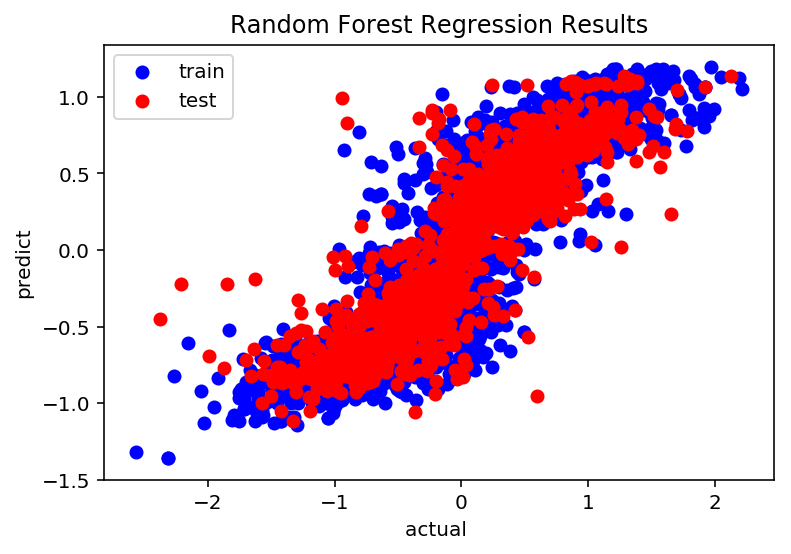

In [16]:
# Fitting the Regression model to the dataset

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300, random_state = 123, min_samples_split=15)
regressor.fit(X_train,y_train)

# Predicting a new result with the Random Forest Regression

Ytrain_Pred = regressor.predict(X_train)
Ytest_Pred = regressor.predict(X_test)

# Visualising the Random Forest Regression results in higher resolution and smoother curve
#X_Grid = np.arange(min(X), max(X), 0.01)
#X_Grid = X_Grid.reshape((len(X_Grid), 1))
plt.scatter(y_train,Ytrain_Pred, color = 'blue',label = 'train')
plt.scatter(y_test,Ytest_Pred, color = 'red',label = 'test')
#plt.plot(X_Grid, regressor.predict(X_Grid), color = 'black')
#plt.plot([-2,2],[-2,2],lw=4,color='black')
plt.title('Random Forest Regression Results')
plt.xlabel('actual ')
plt.ylabel('predict')
plt.legend(loc = 'best')
plt.show()

In [17]:
# predict the prodcut of Aceton
smi = 'CC(=O)C'

In [18]:
#transform smiles string to structure vector
test = darkchem.utils.struct2vec(smi)

In [19]:
# shape the test list
test = np.array(test)
test = test.reshape(-1,100)

In [20]:
test.shape

(1, 100)

In [21]:
# generate the latent space vectors of Aceton
t_l = model.encoder.predict(test)

In [22]:
t_l.shape

(1, 128)

In [23]:
# predict the latent sapce vector of Aceton product using Aceton latent vector
t_pre = regressor.predict(t_l.reshape(1,-1))

In [24]:
#transform product latent space vector to structure vector
t_pred = model.decoder.predict(t_pre)

In [25]:
#search and match the specific prodcuts with the predicted structure vector
trs = darkchem.utils.beamsearch(t_pred, k=10)
# because k = 10, so there will be 10 results, you can change the value of k to get the amount of predicted products.

In [26]:
# shaping
trs = trs.flatten()
trs = trs.reshape(-1,100)

In [27]:
# transform structure vectors to smiles strings
v2s = [darkchem.utils.vec2struct(trs[i]) for i in range(len(trs))]

In [28]:
# transform Dict to DataFrame
sms = {'smiles': v2s}
sms = pd.DataFrame(data = sms)
sms

,smiles
0,CC(CCCC1CCCO)C
1,CC(CCCCCCCCOC
2,CC(CCCCCCCCNCC
3,CC(CCCC(CCCO)C
4,CC(CCCCNCCCO)C
5,CC(CCCCCCCCN)
6,CC(CCCCCCCCOCC
7,CC(CCCCCCCCO)
8,CC(CCCCCCCCN)C
9,CC(CCCCCCCCO)C


In [29]:
#transform smiles strings to molecule structures
df = struc2mol(sms)

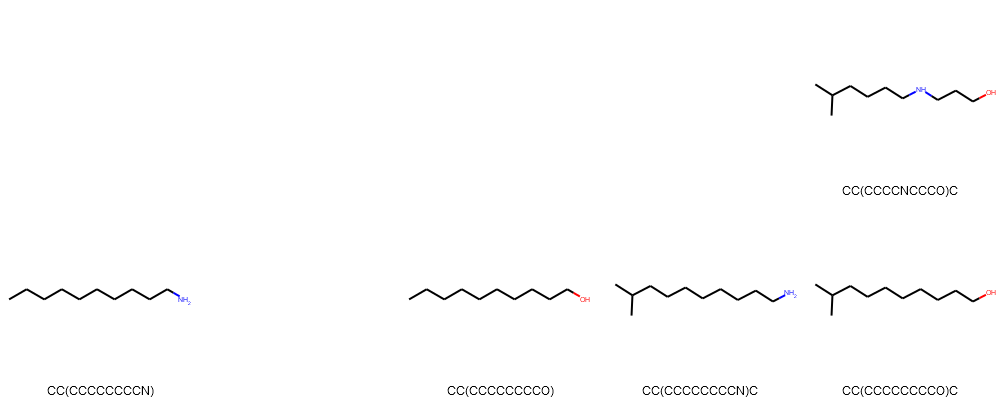

In [30]:
# display the products smiles strings with their molecule structures
display(PandasTools.FrameToGridImage(df,column='mol', legendsCol='smiles',molsPerRow=5))
# contain invalid molecules from the prediction result

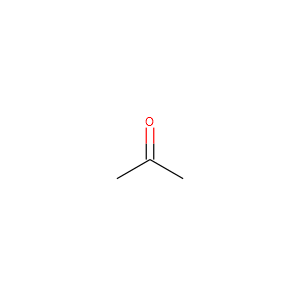

In [31]:
# the molecule structure of reactant
mol = Chem.MolFromSmiles('CC(=O)C')
Draw.MolToImage(mol)

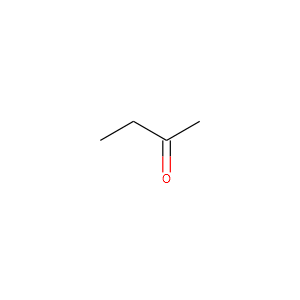

In [32]:
# the actual molecule structure of product
mol = Chem.MolFromSmiles('CCC(=O)C')
Draw.MolToImage(mol)

From here, we can know that according to the regression model built above, we can't predict the correct product of acetone. One reason is that the training set is not big enough, another reason is that the training set are not included in the combined smiles string.py file. Besides, maybe this bad prediction results from the multiple reactants(I encoded all of the reactants into reactants latent space vectors). By the way, maybe we need to screen and select the better descriptors from the 128 dimensional space, drop out the lower correlation descriptors. 